<a href="https://colab.research.google.com/github/ErikFisherGitHub/cpm-pm/blob/main/Kritikus_%C3%9At_M%C3%B3dszer_(CPM)_%E2%80%93_Tudom%C3%A1nyos_Megalapoz%C3%A1s_%C3%A9s_Haszn%C3%A1lati_%C3%9Atmutat%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kritikus Út Módszer (CPM) – Tudományos Megalapozás és Használati Útmutató**

---

## **1. Tudományos Megalapozás**

A **Kritikus Út Módszer (Critical Path Method, CPM)** egy projektmenedzsment technika, amelyet összetett projektek **tervezésére és ütemezésére** használnak. Az eljárás célja a projekt **legrövidebb teljesítési idejének** meghatározása, valamint a **kritikus tevékenységek azonosítása**, amelyek késése közvetlenül hat a teljes projekt befejezésére.

### **1.1 A módszer alapjai**
A CPM egy **irányított gráf** segítségével modellezi a projektet:
- **Csomópontok (nodes):** A projekt egyes tevékenységeit jelölik.
- **Élek (edges):** Az egyes tevékenységek közötti függőségeket reprezentálják.

A módszer két alapvető számítási lépésből áll:
1. **Előre lépés (forward pass)**  
   - Meghatározza az egyes tevékenységek **legkorábbi kezdési idejét (Earliest Start, ES)** és **legkorábbi befejezési idejét (Earliest Finish, EF)**.
   
2. **Hátralépés (backward pass)**  
   - Meghatározza az egyes tevékenységek **legkésőbbi kezdési idejét (Latest Start, LS)** és **legkésőbbi befejezési idejét (Latest Finish, LF)**.

A kritikus út azokat a tevékenységeket tartalmazza, amelyek esetében a legkorábbi és legkésőbbi kezdési idő azonos (**ES = LS**). **Ezek csúszása automatikusan meghosszabbítja a projekt teljes időtartamát.**

### **1.2 A megengedett csúszás (Slack Time)**
A nem kritikus tevékenységek egy meghatározott időkereten belül csúszhatnak anélkül, hogy a teljes projekt befejezése késne. A csúszás kiszámítása:

$$
\text{Slack} = \text{Latest Start (LS)} - \text{Earliest Start (ES)}
$$

A kritikus út tevékenységeinél a csúszás mindig **0**.

---

## **2. Használati Útmutató a Kódhoz**

A Google Colabban futtatható kód **automatikusan kiszámítja a kritikus utat**, valamint vizuálisan megjeleníti a projekt szerkezetét és ütemezését.

### **2.1 Hogyan futtassuk a kódot?**
1. **Telepítsd a szükséges csomagokat**:
   - `graphviz`
   - `pydot`
2. **Futtasd a kódot egy Google Colab cellában.**

### **2.2 Hogyan lehet személyre szabni?**

#### **A) Új tevékenységek és kapcsolatok hozzáadása**
A projekt tevékenységeit egy **lista** tartalmazza, amelyben minden feladat egyedi azonosítóval (**ID**), névvel (**label**), időtartammal (**duration**), és függőségekkel (**dependencies**) rendelkezik.

Új tevékenységet úgy adhatsz hozzá, hogy a listába egy új elemet szúrsz be. Például egy új funkció fejlesztésének hozzáadásához, amely egy meglévő tervezési lépés után következik, ezt a módosítást kell végrehajtani:

- Új elem hozzáadása a listában.
- A megfelelő függőségek megadása.

#### **B) Időtartam módosítása**
Egy adott tevékenység időtartamának módosításához csak az adott **`duration`** értékét kell átírni.

#### **C) Függőségek módosítása**
Ha egy feladatnak új előfeltétele van, azt a **`dependencies`** mezőben lehet módosítani. Például ha a tesztelés egy új funkcióhoz is kapcsolódik, a megfelelő ID-t hozzá kell adni a **függőségek** listájához.

#### **D) Diagram megjelenítés finomítása**
Ha a cím és a tevékenységek szövegei **túl közel jelennek meg**, akkor a diagram és a cím közötti távolságot módosíthatod a következő beállítással:

$$
\text{plt.subplots_adjust(top=0.85)}
$$

Ez segít elkerülni az átfedéseket.

---

## **3. Kimenet Értelmezése**
A kód futtatása után a következő kimeneteket kapod:

### **3.1 Kritikus út hálódiagram**
- A projekt **irányított gráfként** jelenik meg.
- **A kritikus út pirossal ki van emelve**.
- **Minden tevékenység felett látható:**
  - Legkorábbi kezdés és befejezés (**ES, EF**).
  - Legkésőbbi kezdés és befejezés (**LS, LF**).
  - **Megengedett csúszás (Slack Time)**.

### **3.2 Táblázatos Ütemezés**
A kimenet tartalmaz egy **táblázatot**, amely a következő információkat jeleníti meg:
- Tevékenység neve.
- Kezdési és befejezési időpont.
- Kritikus-e a tevékenység (**Yes/No**).
- **Slack idő**, ha a tevékenység nem kritikus.

### **3.3 Gantt-diagram**
- **Piros sávok** jelzik a **kritikus tevékenységeket**.
- **Kék sávok** mutatják a **nem kritikus tevékenységeket**.
- A sávok elhelyezkedése és hossza a tevékenység kezdési idejét és időtartamát mutatja.

---

## **4. Összegzés**
- A **Kritikus Út Módszer (CPM)** segít az optimális ütemezésben és a projekt sikeres megvalósításában.
- A kód **teljesen testreszabható**, így bármilyen projekt esetében alkalmazható.
- A **vizuális megjelenítés** segíti a projekt logikai struktúrájának és időzítésének megértését.
- A **Gantt-diagram és a táblázatos kimenet** világosan bemutatja a kritikus és nem kritikus tevékenységeket.

---

### 🚀 **Ha személyre szeretnéd szabni a modellt, módosítsd a `tasks` listát és futtasd újra a kódot!**


In [27]:
!apt-get install -q graphviz
!pip install -q pydot

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


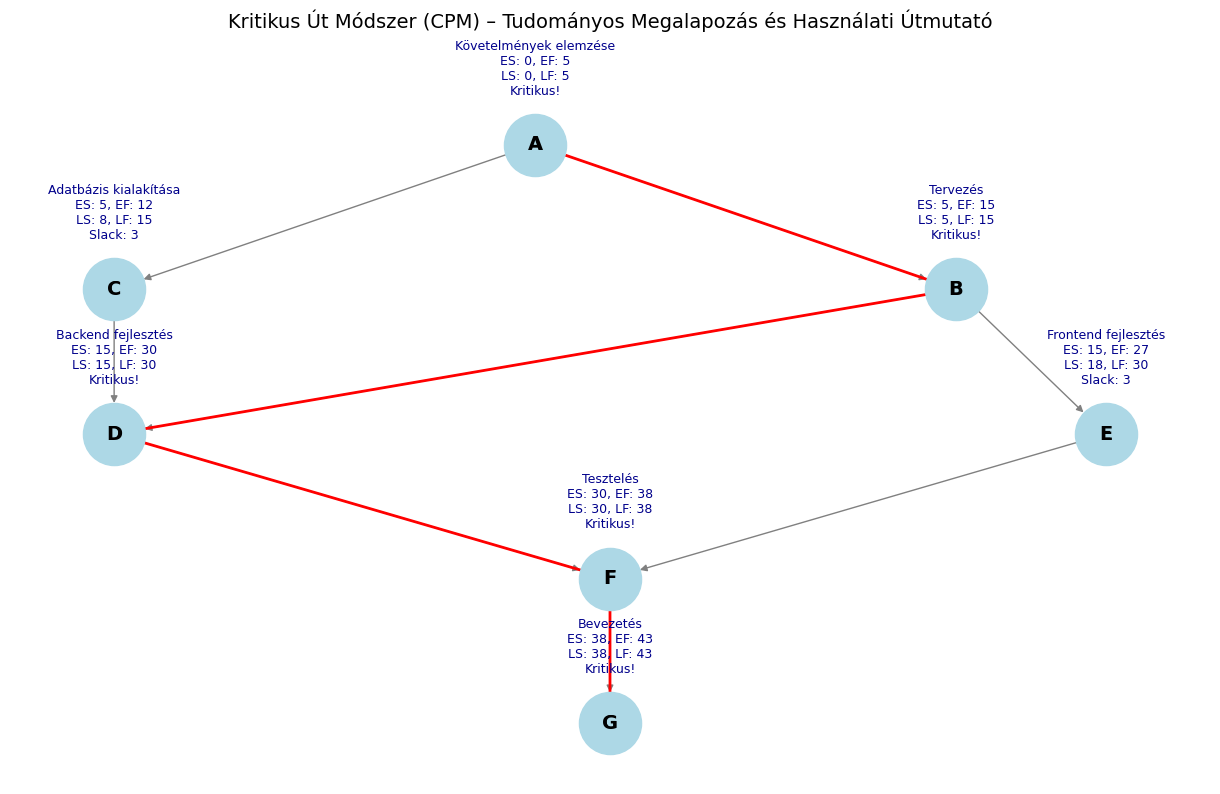

,Task,Start,Finish,Duration,Critical,Slack Time
0,Követelmények elemzése,0,5,5,Yes,0
1,Tervezés,5,15,10,Yes,0
2,Adatbázis kialakítása,5,12,7,No,3
3,Backend fejlesztés,15,30,15,Yes,0
4,Frontend fejlesztés,15,27,12,No,3
5,Tesztelés,30,38,8,Yes,0
6,Bevezetés,38,43,5,Yes,0


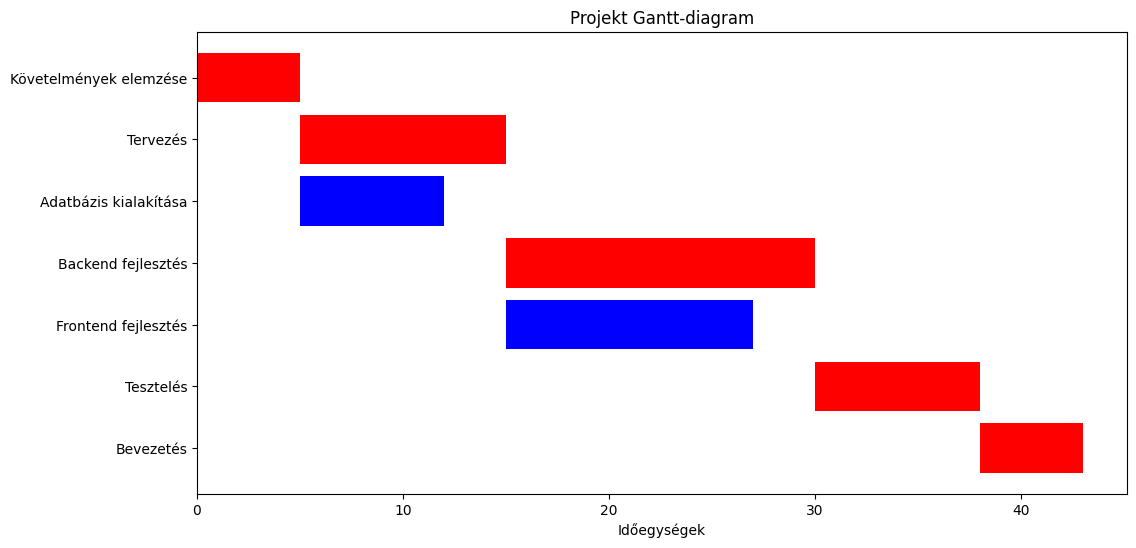

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout  # Pydot-alapú elrendezés

# --- 1. ADATOK DEFINIÁLÁSA ---

tasks = [
    {"ID": "A", "label": "Követelmények elemzése", "duration": 5, "dependencies": []},
    {"ID": "B", "label": "Tervezés", "duration": 10, "dependencies": ["A"]},
    {"ID": "C", "label": "Adatbázis kialakítása", "duration": 7, "dependencies": ["A"]},
    {"ID": "D", "label": "Backend fejlesztés", "duration": 15, "dependencies": ["B", "C"]},
    {"ID": "E", "label": "Frontend fejlesztés", "duration": 12, "dependencies": ["B"]},
    {"ID": "F", "label": "Tesztelés", "duration": 8, "dependencies": ["D", "E"]},
    {"ID": "G", "label": "Bevezetés", "duration": 5, "dependencies": ["F"]}
]

# --- 2. HÁLÓZATI MODELL FELÉPÍTÉSE ---

G = nx.DiGraph()

for task in tasks:
    G.add_node(task["ID"], label=task["label"], duration=task["duration"])  # "name" helyett "label"

for task in tasks:
    for dep in task["dependencies"]:
        G.add_edge(dep, task["ID"])

# --- 3. KRITIKUS ÚT KISZÁMÍTÁSA (CPM) ---

earliest_start = {}
latest_start = {}
earliest_finish = {}
latest_finish = {}

for node in nx.topological_sort(G):
    predecessors = list(G.predecessors(node))
    if not predecessors:
        earliest_start[node] = 0
    else:
        earliest_start[node] = max(earliest_finish[p] for p in predecessors)
    earliest_finish[node] = earliest_start[node] + G.nodes[node]["duration"]

project_duration = max(earliest_finish.values())

for node in reversed(list(nx.topological_sort(G))):
    successors = list(G.successors(node))
    if not successors:
        latest_finish[node] = project_duration
    else:
        latest_finish[node] = min(latest_start[s] for s in successors)
    latest_start[node] = latest_finish[node] - G.nodes[node]["duration"]

# Kritikus út azonosítása
critical_path = [node for node in G.nodes if earliest_start[node] == latest_start[node]]

# **Csúszási idő (slack) kiszámítása**
slack_time = {node: latest_start[node] - earliest_start[node] for node in G.nodes}

# --- 4. VIZUÁLIS MEGJELENÍTÉS ---

# 4.1 Kritikus út ábrázolása BALRÓL JOBBRA ELRENDEZÉSSEL
plt.figure(figsize=(12, 7))

# **Graphviz "dot" algoritmus használata pydot-on keresztül**
pos = graphviz_layout(G, prog="dot")

# **Megnöveljük a diagram és a cím közötti távolságot**
plt.subplots_adjust(top=0.85)

# Csomópontok alaprajzolása
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)

# Kritikus út élei pirossal
critical_edges = [(u, v) for u, v in G.edges if u in critical_path and v in critical_path]
nx.draw_networkx_edges(G, pos, edgelist=critical_edges, edge_color="red", width=2)

# Betűk külön a csomópont belsejében
nx.draw_networkx_labels(G, pos, font_size=14, font_color="black", font_weight="bold")

# **Feliratokat (slack time) feljebb tolni, hogy ne ütközzön a címmel**
for node in G.nodes:
    x, y = pos[node]
    slack_text = f"Slack: {slack_time[node]}" if slack_time[node] > 0 else "Kritikus!"
    plt.text(x, y + 25,  # **Megnöveltük a függőleges eltávolodást**
             f"{G.nodes[node]['label']}\nES: {earliest_start[node]}, EF: {earliest_finish[node]}\nLS: {latest_start[node]}, LF: {latest_finish[node]}\n{slack_text}",
             fontsize=9, ha="center", color="darkblue")

# **A cím betűméretének csökkentése és távolabb helyezése**
plt.title("Kritikus Út Módszer (CPM) – Tudományos Megalapozás és Használati Útmutató", fontsize=14, pad=40)
plt.show()

# --- 4.2 Gantt-diagram készítése ---

df = pd.DataFrame(
    {
        "Task": [G.nodes[node]["label"] for node in G.nodes],
        "Start": [earliest_start[node] for node in G.nodes],
        "Finish": [earliest_finish[node] for node in G.nodes],
        "Duration": [G.nodes[node]["duration"] for node in G.nodes],
        "Critical": ["Yes" if node in critical_path else "No" for node in G.nodes],
        "Slack Time": [slack_time[node] for node in G.nodes]
    }
)

# Táblázatos megjelenítés
display(df)

# Gantt-diagram rajzolása
fig, ax = plt.subplots(figsize=(12, 6))
y_pos = np.arange(len(df))

for i, row in df.iterrows():
    color = "red" if row["Critical"] == "Yes" else "blue"
    ax.barh(y_pos[i], row["Duration"], left=row["Start"], color=color, align="center")

ax.set_yticks(y_pos)
ax.set_yticklabels(df["Task"])
ax.invert_yaxis()
ax.set_xlabel("Időegységek")
ax.set_title("Projekt Gantt-diagram")

plt.show()
